In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt

Prepare data

In [2]:
df = pd.read_csv('data/DatasetEV3.csv')
df = df[df["100% representative"] ==1]
df = df[(df['75% form I']==1) | (df['85% IAB, 75%rest']==1)]

df = df.replace("chemo", "chemotroph")
df = df.replace("photo", "phototroph")

df['Rate mean [s-1]'] = df['Rate mean [s-1]'].astype(float)

my_pal = {"chemotroph": '#7e7e7eff', "phototroph": '#ffd343ff'}


# Filter "thermophile/hot envir" 
df_vent = df[df['environmental_context'] == "hydrothermal vent"]
df_spring = df[df['environmental_context'] == "hot spring"]
df_thermophile = df[df['T°_opt'] >= 45]

df_thermophile_hot_envir = pd.concat([df_vent, df_spring, df_thermophile])
df_thermophile_hot_envir = df_thermophile_hot_envir.drop_duplicates()

df_filtered = df[~df.index.isin(df_thermophile_hot_envir.index)]

Statistical tests

In [3]:
group1 = df[df['energy'] == 'chemotroph']['Rate mean [s-1]'].dropna()
group2 = df[df['energy'] == 'phototroph']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic, pvalue = mannwhitneyu(group1, group2)

if pvalue < 0.05:
    print(f'+ thermophilic/hot environment\nMann-Whitney U test: The two groups are significantly different. p = {pvalue}\n')
else:
    print('+ thermophilic/hot environment\nMann-Whitney U test: The two groups are not significantly different\n')

group1_filtered = df_filtered[df_filtered['energy'] == 'chemotroph']['Rate mean [s-1]'].dropna()
group2_filtered = df_filtered[df_filtered['energy'] == 'phototroph']['Rate mean [s-1]'].dropna()

# Mann-Whitney U test
statistic_filtered, pvalue_filtered = mannwhitneyu(group1_filtered, group2_filtered)

if pvalue_filtered < 0.05:
    print(f'- thermophilic/hot environments\nMann-Whitney U test: The two groups are significantly different. p = {pvalue_filtered}')
else:
    print('- thermophilic/hot environment\nMann-Whitney U test: The two groups are not significantly different') 

+ thermophilic/hot environment
Mann-Whitney U test: The two groups are significantly different. p = 0.0034145826717771614

- thermophilic/hot environments
Mann-Whitney U test: The two groups are significantly different. p = 0.009107522768531709


Plot

/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benoitdepins/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

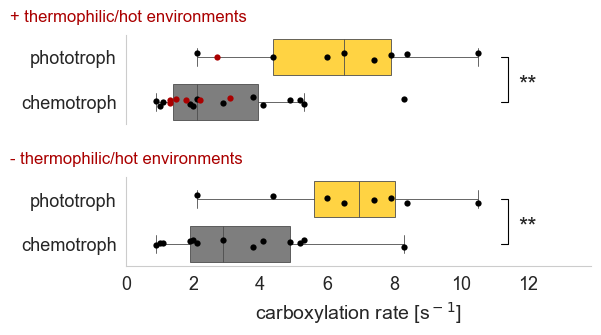

In [4]:
plt.rc('font', size=13)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(6, 3), gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.6})

# boxplot/swarmplot on first axis for the main group
sns.boxplot(data=df, x='Rate mean [s-1]', y='energy', palette=my_pal, saturation=1, ax=axs[0], order=["phototroph", "chemotroph"], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='energy', color='black', ax=axs[0], order=["phototroph", "chemotroph"], jitter=True, size=4.5)
sns.stripplot(data=df_thermophile_hot_envir, x='Rate mean [s-1]', y='energy', color='#aa0000ff', ax=axs[0], order=["phototroph", "chemotroph"], jitter=True, size=4.5)

axs[0].set_ylabel('')
axs[0].spines.top.set_visible(False)
axs[0].spines.right.set_visible(False)
axs[0].spines.bottom.set_visible(False)
axs[0].set_xlabel('')
axs[0].set(xticklabels=[])
axs[0].tick_params(bottom=False)
axs[0].set_xlim(0, 13.9)
axs[0].grid(False)

# Add stars to box plot to indicate significance level
if pvalue <= 0.0001:
    star = '****'
elif pvalue <= 0.001:
    star = '***'
elif pvalue <= 0.01:
    star = '**'
elif pvalue <= 0.05:
    star = '*'
else:
    star = 'ns'

axs[0].plot([11.2, 11.4, 11.4, 11.2], [0, 0, 1, 1], lw=.8, c = 'black')
axs[0].text(12, .9, star, ha='center', va='bottom', fontsize=17)

# Create a second boxplot/swarmplot on the second axis without the "thermophile/hot envir" group
sns.boxplot(data=df_filtered, x='Rate mean [s-1]', y='energy', palette=my_pal, saturation=1, ax=axs[1], order=["phototroph", "chemotroph"], showfliers=False, linewidth=0.6)
sns.stripplot(data=df_filtered, x='Rate mean [s-1]', y='energy', color='black', ax=axs[1], order=["phototroph", "chemotroph"], jitter=True, size=4.5)

axs[1].set_ylabel('')
axs[1].spines.top.set_visible(False)
axs[1].spines.right.set_visible(False)
axs[1].set_xlabel('carboxylation rate [s$^-$$^1$]', fontsize=14)
axs[1].set_xlim(0, 13.9)
axs[1].grid(False)

# Add stars to box plot to indicate significance level
if pvalue_filtered <= 0.0001:
    star = '****'
elif pvalue_filtered <= 0.001:
    star = '***'
elif pvalue_filtered <= 0.01:
    star = '**'
elif pvalue_filtered <= 0.05:
    star = '*'
else:
    star = 'ns'

axs[1].plot([11.2, 11.4, 11.4, 11.2], [0, 0, 1, 1], lw=.8, c = 'black')
axs[1].text(12, .9, star, ha='center', va='bottom', fontsize=17)

axs[0].text(-0.25, 1.15, '+ thermophilic/hot environments', transform=axs[0].transAxes, fontsize=12, color="#aa0000ff")
axs[1].text(-0.25, 1.15, '- thermophilic/hot environments', transform=axs[1].transAxes, fontsize=12, color="#aa0000ff")

fig.patch.set_facecolor('none')
plt.savefig(r'plots/photo_chemo_non_homog_no_thermophile_hot_envir.svg', dpi=300, bbox_inches='tight')
plt.show()


Summary table

In [5]:
grouped_df = df[df['Rate mean [s-1]'] > 0].groupby('energy')['Rate mean [s-1]']

summary_table = grouped_df.agg(['count', 'median', 'std'])

iqr1 = grouped_df.quantile(0.25)
iqr3 = grouped_df.quantile(0.75)

summary_table = summary_table.round(4)
iqr1 = iqr1.round(4)
iqr3 = iqr3.round(4)

summary_table.columns = ['Number of Samples', 'Median Rate', 'Standard Deviation']
iqr1.name = 'IQR1'
iqr3.name = 'IQR3'

summary_table['IQR1'] = iqr1
summary_table['IQR3'] = iqr3

print('+ thermophilic/hot environment')
print(summary_table )

grouped_df = df_filtered[df_filtered['Rate mean [s-1]'] > 0].groupby('energy')['Rate mean [s-1]']

summary_table = grouped_df.agg(['count', 'median', 'std'])

iqr1 = grouped_df.quantile(0.25)
iqr3 = grouped_df.quantile(0.75)

summary_table = summary_table.round(4)
iqr1 = iqr1.round(4)
iqr3 = iqr3.round(4)

summary_table.columns = ['Number of Samples', 'Median Rate', 'Standard Deviation']
iqr1.name = 'IQR1'
iqr3.name = 'IQR3'

summary_table['IQR1'] = iqr1
summary_table['IQR3'] = iqr3

print('\n- thermophilic/hot environment')
print(summary_table)

+ thermophilic/hot environment
            Number of Samples  Median Rate  Standard Deviation  IQR1  IQR3
energy                                                                    
chemotroph                 19          2.1              1.9518   1.4  3.95
phototroph                  9          6.5              2.7406   4.4  7.90

- thermophilic/hot environment
            Number of Samples  Median Rate  Standard Deviation  IQR1   IQR3
energy                                                                     
chemotroph                 13         2.90              2.1827   1.9  4.900
phototroph                  8         6.95              2.5696   5.6  8.025
